<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/pokemons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 


import seaborn as sns

<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

In [ ]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


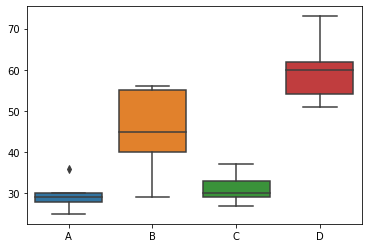

In [ ]:
# пусть значения здесь - возраст покупателей, а группы - 4 разных товара. Суть анализа: понять, есть ли разница в возрасте между покупателями групп.
# сперва сделаем boxplot
sns.boxplot( data = df)

In [ ]:
# по визуализации уже видно, что группы отлчиаются, но проверим через дисперсионный анализ.
# Н0: средние групп равны, уровень значимости - 0.05, Н1 : не равны
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(f'F-значение: {fvalue}, p-значение: {pvalue}') 

F-значение: 17.492810457516338, p-значение: 2.639241146210922e-05


In [ ]:
# p значительно меньше уровня значимости, F значительно выше 1 -> Н0 отвергаем, принимаем Н1.
# По коробке лекго увидеть, что в df только группы A и C похожи - проверим.
# Н0: нет значимых различий между группами А и С 
tstat, pvalue = stats.ttest_ind(df['A'], df['C'])
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

t-статистика: -0.6374552583116757, p-значение: 0.541638025048848


In [ ]:
# В итоге товары групп А и С покупают люди одной возрастной категории.
# Можно также увидеть, что товары В наиболее независимы от возраста(наиболее вариативны и покупаются практически всеми, кроме самых пожилых.)
# Товары D, напротив, популярны только у старшей возрастной группы.

<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

fvalue, pvalue = stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)
print(f'F-значение: {fvalue}, p-значение: {pvalue}') 

F-значение: 7.121019471642447, p-значение: 0.0002812242314534544


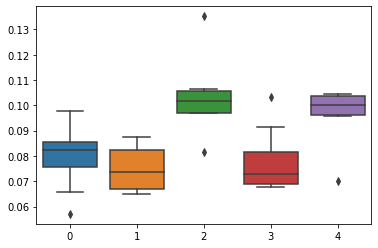

In [ ]:
# Итак, p очень маленькое. Значит, должны отвегрнуть стандартную для ANOVA Н0 о равенстве исследуемых групп.
# Визуализируем 
sns.boxplot(data = [tillamook, newport, petersburg, magadan, tvarminne])

In [ ]:
# По коробкам видно, что можно выделить два подмножества: 1) tillamook, newport,magadan 2) petersburg, tvarminne
# H0 - города в подмножествах не отличаются между собой.
fvalue, pvalue = stats.f_oneway(tillamook, newport, magadan)
print(f'F-значение: {fvalue}, p-значение: {pvalue}') 

F-значение: 0.5013670825971185, p-значение: 0.6121697828314367


In [ ]:
# подмножество 1 не отличается - нельзя отвергнуть Н0
# для подмножества 2 будет Стьюдент
tstat, pvalue = stats.ttest_ind(petersburg, tvarminne)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )
# Тоже нельзя отвергнуть Н0

t-статистика: 0.9389823202104046, p-значение: 0.3679008242983298


In [ ]:
#

# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
# Две независимые выборки с нормальным распределением. Стьюдент:
tstat, pvalue = stats.ttest_ind(A, B)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

t-статистика: -1.733800647210997, p-значение: 0.08451003973499756


СКО А: 27.99152288971913 В: 57.93499383529171


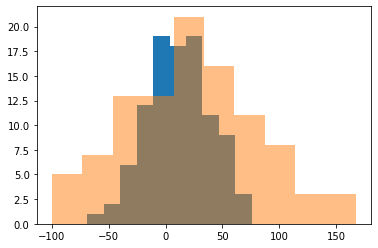

In [ ]:
# Гипотезу о равенстве средних отвергнуть не можем. Однако p всё равно невелико, а отрицательняа t говорит о превосходстве значений B
# над А. Гистограмма.
plt.hist(A)
plt.hist(B, alpha = 0.5)
print('СКО А:', A.std(),'В:', B.std())

In [ ]:
# В итоге мы можем говорить о схожести эффектов, но вариация B в два раза шире. 

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

t-статистика: -2.1701703735210716, p-значение: 0.03238579156467659
СКО А: 27.99152288971913 В: 57.93499383529171


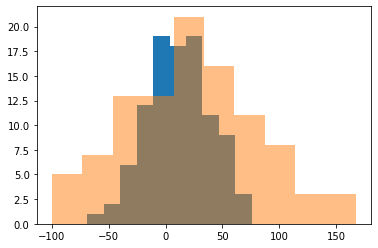

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
# Стьюдент для зависимых
tstat, pvalue = stats.ttest_rel(A, B)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )
plt.hist(A)
plt.hist(B, alpha = 0.5)
print('СКО А:', A.std(),'В:', B.std())

In [ ]:
# Всё упирается в порог значимости. Вроде как по p < 0.05 мы должны отвергнуть гипотезу о равенстве(есть эффект от препарата).
# Но всё же p > 0.01, принятый в медицине, и у нас очевидно схожие средние. Эффект от препарата есть, но он незначителен.

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.
fvalue, pvalue = stats.f_oneway(water, nutri, mineral)
print(f'F-значение: {fvalue}, p-значение: {pvalue}') 




F-значение: 12.525963044834192, p-значение: 2.9240047906326866e-05


In [ ]:
# Средние различаются, как это видно по результатам. 

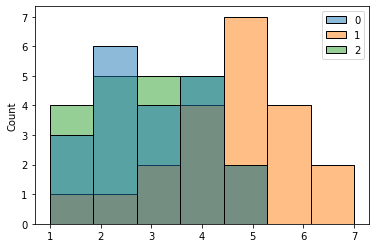

In [ ]:
sns.histplot(data = [water, nutri, mineral])

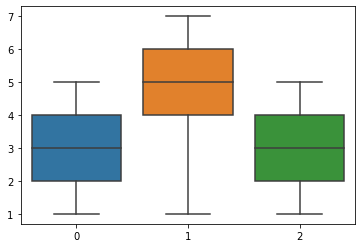

In [ ]:
sns.boxplot(data = [water, nutri, mineral])

In [ ]:
# Проверим воду и минералку. Н0: эффекты одинаковы
tstat, pvalue = stats.ttest_ind(water, mineral)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

# Проверим удобрения и минералку. Н0: эффекты одинаковы
print('Есть ли разница между минералкой и удобрениями?')
tstat, pvalue = stats.ttest_ind(nutri, mineral)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

t-статистика: 0.10129659201078253, p-значение: 0.9198340218471441
Есть ли разница между минералкой и удобрениями?
t-статистика: 4.257784009579262, p-значение: 0.00012136733401245426


In [ ]:
# Не можем отвергунть Н0 в случае воды и минералки.
# Отвергаем Н0 в минералке и удобрениях. Эффект отличается.

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



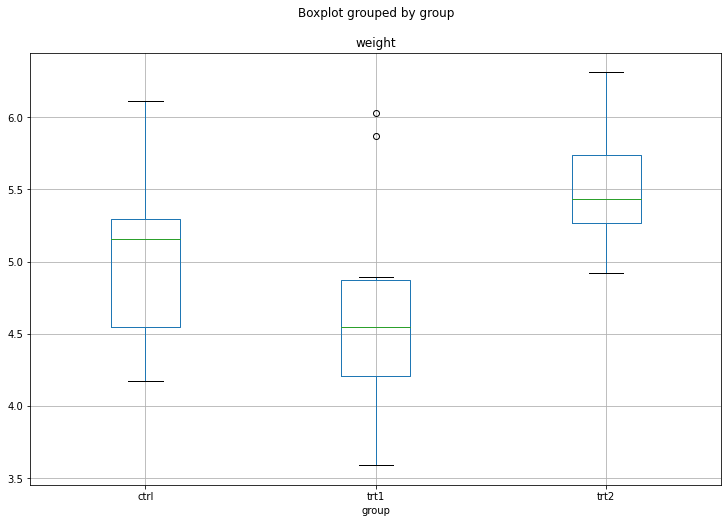

In [ ]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));


In [ ]:
data.groupby('group').mean()

,Unnamed: 0,weight
group,,
ctrl,5.5,5.032
trt1,15.5,4.661
trt2,25.5,5.526


In [ ]:
values = [ value for group, value in data.groupby(data['group'])['weight']]
fvalue, pvalue = stats.f_oneway(*values)
print(f'F-значение: {fvalue}, p-значение: {pvalue}') 

F-значение: 4.846087862380136, p-значение: 0.0159099583256229


In [ ]:
# дисперсионный анализ показывает, что группы статистически неравны.
# Boxplot и средняя показывает, что сравнить стоит группы 1 и 3
tstat, pvalue = stats.ttest_ind(values[0], values[2], equal_var = False)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

t-статистика: -2.1340204531240654, p-значение: 0.047899255601968956


In [ ]:
# Гипотеза о равенстве отвергается. 3 группа превосходит 1.
# Использовать удобрение 3

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
grass = pokemon[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass') ]
rock = pokemon[ ( pokemon['Class 1'] == 'Rock' ) | ( pokemon['Class 2'] == 'Rock' ) ]
# проверим на принадлежность к обоим классам
pokemon[(pokemon['pid'].isin(grass['pid'])) & (pokemon['pid'].isin(rock['pid']))]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Multi
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False,184,208362
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False,264,675702


In [ ]:
# удалим
grass = grass.drop( grass[(grass['pid'] == 378) | (grass['pid'] == 379)].index)
rock = rock.drop(rock[(rock['pid'] == 378) | (rock['pid'] == 379)].index)
# посмотрим на основне статистики
print('Grass')
print(grass['Attack'].describe())
print('--'*10)
print('Rock')
print(rock['Attack'].describe())

Grass
count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64
--------------------
Rock
count     56.000000
mean      91.785714
std       34.805284
min       10.000000
25%       63.000000
50%       92.500000
75%      116.250000
max      165.000000
Name: Attack, dtype: float64


In [ ]:
# Из describe видно, что у класса rock существенно выше и средняя, и медиана, 
# и только нижний квартиль уступает 
# по значению grass. Этих фактов в прицнипе достаточно, чтобы опровергнуть профессора.
# Но статистическое исследование даст нам ещё больше оснований для этого

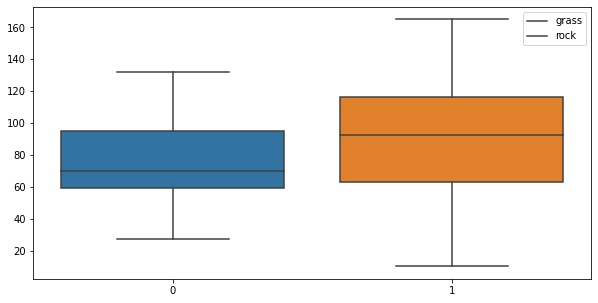

In [ ]:
plt.figure(figsize = [10,5])
sns.boxplot( data = [grass['Attack'], rock['Attack']])
plt.legend(labels = ['grass', 'rock'])

In [ ]:
# У нас две несвязанные выборки с нормальным распределением и разными дисперсиями.Для надёжности 
# используем критерий Уэлча.H0 - два класса равны.
tstat, pvalue = stats.ttest_ind(grass['Attack'], rock['Attack'], equal_var = False)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

t-статистика: -3.4169379582521513, p-значение: 0.0009640546913545304


In [ ]:
# В итоге тест доказывает, что гипотеза о равенсте ошибочна,а t-статистика однозначно говорит о 
# том, что атака класса rock статистически превосходит grass 

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
water = pokemon[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water') ]
normal = pokemon[ ( pokemon['Class 1'] == 'Normal' ) | ( pokemon['Class 2'] == 'Normal' ) ]
# проверим на принадлежность к обоим классам
pokemon[(pokemon['pid'].isin(water['pid'])) & (pokemon['pid'].isin(normal['pid']))]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
445,446,Bibarel,Normal,Water,79,85,60,55,60,71,False


In [ ]:
# удалим
water = water.drop( water[water['pid'] == 446].index)
normal = normal.drop( normal[normal['pid'] == 446].index)
# посмотрим на основне статистики
print('Water')
print(water['Speed'].describe())
print('--'*10)
print('Normal')
print(normal['Speed'].describe())

Water
count    125.00000
mean      64.93600
std       22.74889
min       15.00000
25%       50.00000
50%       65.00000
75%       81.00000
max      122.00000
Name: Speed, dtype: float64
--------------------
Normal
count    101.000000
mean      72.257426
std       28.427330
min        5.000000
25%       50.000000
50%       72.000000
75%       93.000000
max      135.000000
Name: Speed, dtype: float64


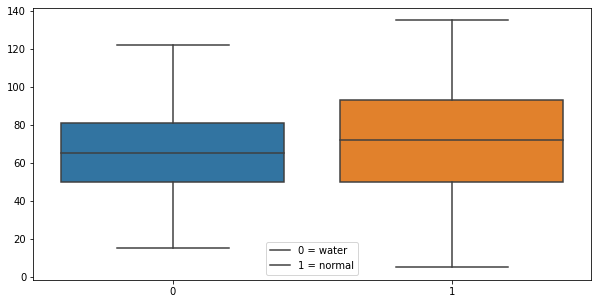

In [ ]:
# Куда более интересная ситуация. Средние и медианы скоростей обоих классов близки, каждая 
# попадает в СКО другой с запасом. Normal чуть выше, но это различие может оказаться статистически незначимым.
plt.figure(figsize = [10,5])
sns.boxplot( data = [water['Speed'], normal['Speed']])
plt.legend(labels = ['0 = water', '1 = normal'])

In [ ]:
tstat, pvalue = stats.ttest_ind(water['Speed'], normal['Speed'], equal_var = False)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

t-статистика: -2.101186385266549, p-значение: 0.03694772338274292


In [ ]:
# И всё же нет. Тест показывает, что равенство скоростей близко к случайности. 
# Вывод: два класса неравны, и значения средней, медианы и t-статистики доказывают, что Normal быстрее Water.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
print('Статистики для скорости по всем покемонам:\n', pokemon['Speed'].describe())
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed

Статистики для скорости по всем покемонам:
 count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Multi
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,255,390000
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False,170,178750
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True,250,375000
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,295,830960


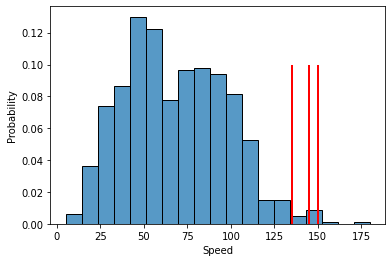

In [ ]:
# Видим, что скорость испытуемых покемонов в два раза выше средней скорости и находится в четвёртом квартиле. Причём скорость испытуемых 
# несильно различается. Сделаем гистограмму вероятностей и линиями покажем испытуемых
fig, ax = plt.subplots()
ax.vlines(treathed['Speed'], 0, 0.1, color='r', lw=2)
sns.histplot(x=pokemon['Speed'], stat='probability', discrete=False)

In [ ]:
# из графика видим, что вероятность случайного попадания испытуемых в такие значения скоростей меньше 2%.
# То есть, для 4 покемонов это (0.02)**4
# Проверим через Z-статистику и p
z = 4 **0.5*(treathed['Speed'].mean()-pokemon['Speed'].mean())/pokemon['Speed'].std()
p = 1 - ( stats.norm.cdf(z) - stats.norm.cdf(-z))
print(z, p)

5.280196100498664 1.290456965730158e-07


In [ ]:
# Проверим также одновыборочным t-тестом
t_value, p_value = stats.ttest_1samp(a= treathed['Speed'], popmean=pokemon['Speed'].mean())
print('t_value', t_value, 'p_value', p_value)

t_value 21.700400007833956 p_value 0.0002141693689312797


In [ ]:
# Итог: средняя скорости испытуемых на 5 сигм отстоит от среднего ГС и вероятность случайности этого факта можно считать нулевой.
# Сыворотка профессора работает.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon['Sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['Multi'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
not_legends = pokemon[pokemon['Legendary'] == False]
not_legends[['Sum', 'Multi']].describe()

,Sum,Multi
count,735.000000,7.350000e+02
mean,214.410884,4.250414e+05
std,64.359599,3.713542e+05
min,55.000000,2.500000e+03
25%,165.000000,1.512250e+05
50%,213.000000,3.315000e+05
75%,258.000000,5.735375e+05
max,440.000000,2.460000e+06


In [ ]:
legends = pokemon[pokemon['Legendary'] == True]
legends[['Sum', 'Multi']].describe()

,Sum,Multi
count,65.000000,6.500000e+01
mean,309.076923,1.085942e+06
std,46.429822,5.169911e+05
min,230.000000,1.800000e+05
25%,275.000000,6.885000e+05
50%,305.000000,1.000000e+06
75%,340.000000,1.350000e+06
max,440.000000,2.880000e+06


t-статистика: 15.19759110757148, p-значение: 2.9282718703329855e-26


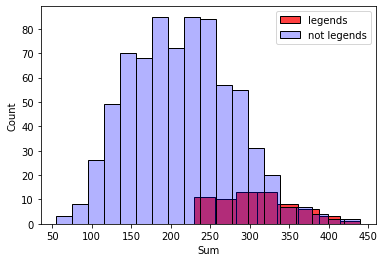

In [ ]:
# Видим, что суммы и произведения у легендарных полностью превосходят нелегендарных. 
# t-тест для разных выборок и гистограммы сумм
tstat, pvalue = stats.ttest_ind(legends['Sum'], not_legends['Sum'], equal_var = False)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

legend = 'legends,not_legends'
sns.histplot(legends['Sum'], color ='r', label = 'legends')
sns.histplot(not_legends['Sum'], color = 'b', alpha = 0.3, label = 'not legends')
plt.legend()


t-статистика: 10.079078507434385, p-значение: 2.895038880907388e-15


Text(0.5, 0, 'Значения в логарфимах по осн.10')

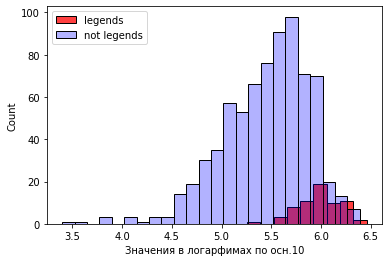

In [ ]:
# Статистика однозначно говорит, что выборки неравны и легенды значительно превосходят по суммам нелегенд.
# произведение дополнительно прологорифмируем
tstat, pvalue = stats.ttest_ind(legends['Multi'], not_legends['Multi'], equal_var = False)
print(f't-статистика: {tstat}, p-значение: {pvalue}' )

legend = 'legends,not_legends'
sns.histplot(np.log10(legends['Multi']), color ='r', label = 'legends')
sns.histplot(np.log10(not_legends['Multi']), color = 'b', alpha = 0.3, label = 'not legends')
plt.legend()
plt.xlabel('Значения в логарфимах по осн.10')

In [ ]:
# Тот же вывод, что и для сумм. Легенды превосходят.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
defence_pokemon = pokemon[(pokemon['Class 1'].isin(best_defence_class)) | (pokemon['Class 2'].isin(best_defence_class))]
defence_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Multi
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210,318750
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,269,720360
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,260,636174
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90,13750


In [ ]:
# у нас два атрибута классов, что не очень удобно, поэтому сделаем однозначно один
def classifier(row):
    for pok_class in best_defence_class:
        if pok_class == row['Class 1'] or pok_class == row['Class 2']:
            return pok_class

defence_pokemon['def_class'] = defence_pokemon.apply(classifier, axis = 1)
# сгруппируем по классам, посмотрим статистики обороны

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
defence_pokemon['Defense'].groupby(defence_pokemon['def_class']).describe()

,count,mean,std,min,25%,50%,75%,max
def_class,,,,,,,,
Ground,58.0,84.586207,37.871915,25.0,56.25,80.0,105.00,230.0
Ice,33.0,78.515152,35.804261,15.0,50.00,80.0,90.00,184.0
Rock,58.0,107.086207,38.373641,40.0,85.00,104.0,130.00,230.0
Steel,40.0,109.325000,32.157774,50.0,90.25,100.0,129.25,230.0


In [ ]:
# Видим, что обороны в классах в итоге неравны. Но значимо ли это статистически?
# Используем дисперсионный анализ . Сделаем список значений 
values = [ value for class_, value in defence_pokemon.groupby(defence_pokemon['def_class'])['Defense']]

F-значение: 7.9514980996475, p-значение: 5.14025760317303e-05


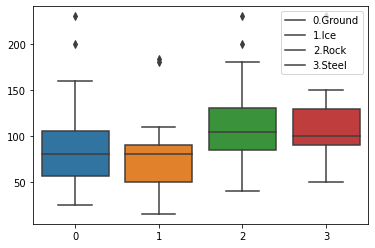

In [ ]:
fvalue, pvalue = stats.f_oneway(*values)
print(f'F-значение: {fvalue}, p-значение: {pvalue}') 

legend = [ '0.Ground', '1.Ice', '2.Rock', '3.Steel']
sns.boxplot( data = values)
plt.legend(legend)

In [ ]:
# В итоге дисперсионный анализ подтверждает, что классы неравны. Профессор ошибся.